# Jaccard Distance

The Jaccard Distance is a measure of dissimilarity between two finite sets. It's inversely related to the Jaccard Similarity (also known as Jaccard Index or Intersection over Union), which quantifies the overlap between two sets.

Essentially, Jaccard distance tells you how many unique elements are present in either set that are not common to both, relative to the total number of unique elements across both sets.


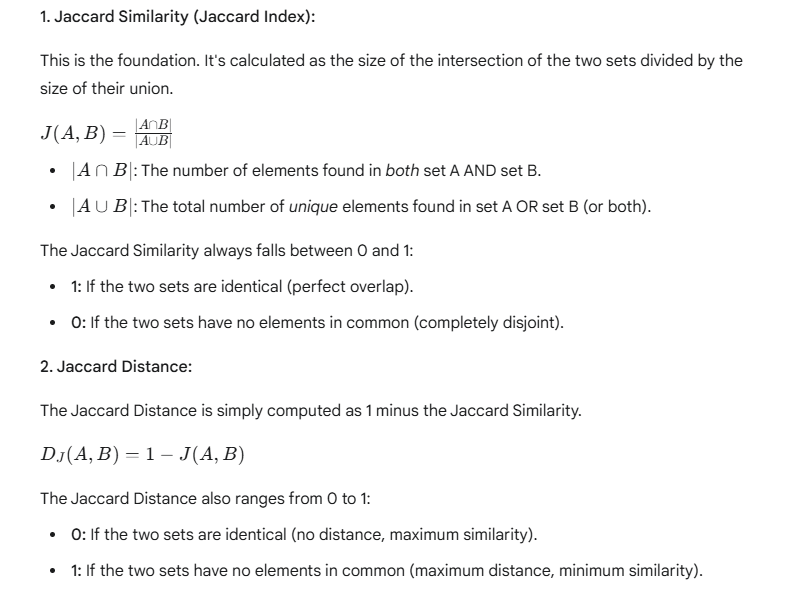

Example: Comparing Customer Browse Histories (Websites Visited)

Imagine an e-commerce company wants to understand customer behavior. They track the set of unique websites visited by different customers during a shopping session. We want to find how similar or dissimilar two customers' Browse behaviors are based on the websites they visited.

Let's look at two customers' Browse histories as sets of website IDs:

Customer P's Session (Set P):
P = {Website_A, Website_B, Website_C, Website_D, Website_E}

Customer Q's Session (Set Q):
Q = {Website_C, Website_D, Website_E, Website_F, Website_G}

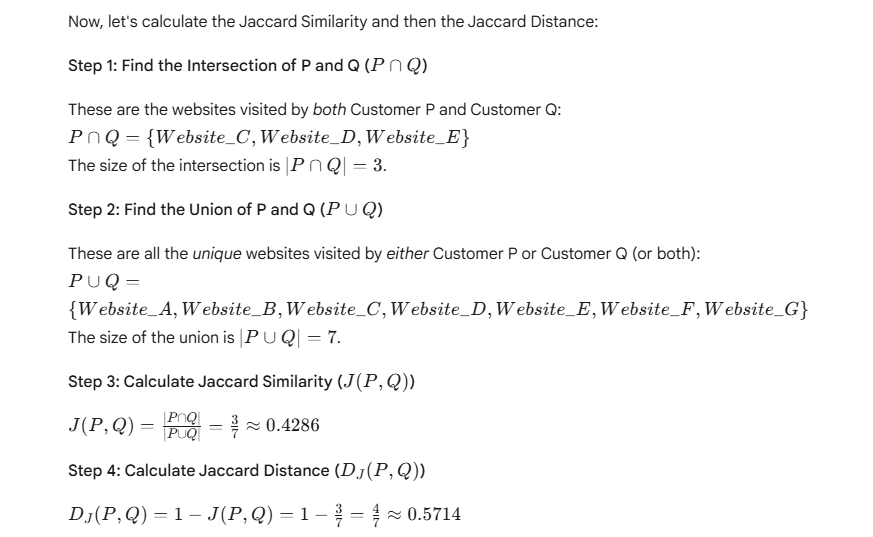

Interpretation:

The Jaccard Similarity of approximately 0.43 tells us that about 43% of the unique websites visited by either customer were common to both.
The Jaccard Distance of approximately 0.57 tells us that the two customers' Browse sessions are moderately dissimilar. A distance of 0.57 implies that 57% of the unique websites visited were not common to both.
This metric is incredibly useful for understanding the overlap between sets, making it perfect for:

Document Similarity: Comparing sets of unique words (or n-grams) in two documents.
Image Segmentation: Comparing two proposed image segmentations (sets of pixels).
Collaborative Filtering: Finding users who share similar item preferences in recommendation systems (when represented as sets of items).
Plagiarism Detection: Quantifying the similarity between code snippets or text passages.

# Notebook Structure

1. Import necessary libraries
2. Create the dataset
3. Define the utility function - Jaccard Distance
4. Calculate Jaccard Distance between different users

# 1. Import necessary libraries

In [21]:
import numpy as np
from scipy.spatial.distance import jaccard # SciPy has a built-in function

# 2. Create the dataset

In [22]:
# Example Data: Customer shopping carts (sets of product IDs)

customer_a_cart = {'milk', 'bread', 'eggs', 'juice', 'coffee'}
customer_b_cart = {'milk', 'bread', 'butter', 'cheese', 'yogurt'}
customer_c_cart = {'eggs', 'juice', 'coffee', 'cereal', 'fruit'}
customer_d_cart = {'milk', 'bread', 'eggs', 'juice', 'coffee'} # Identical to Customer A

In [23]:
print("--- Jaccard Distance Example: Customer Shopping Carts ---")

print(f"Customer A Cart: {customer_a_cart}")
print(f"Customer B Cart: {customer_b_cart}")
print(f"Customer C Cart: {customer_c_cart}")
print(f"Customer D Cart: {customer_d_cart}\n")

--- Jaccard Distance Example: Customer Shopping Carts ---
Customer A Cart: {'milk', 'eggs', 'bread', 'coffee', 'juice'}
Customer B Cart: {'milk', 'yogurt', 'bread', 'butter', 'cheese'}
Customer C Cart: {'eggs', 'fruit', 'cereal', 'coffee', 'juice'}
Customer D Cart: {'milk', 'eggs', 'bread', 'coffee', 'juice'}



# 3. Define the utility function - Jaccard Distance

In [24]:
def calculate_jaccard_distance(set1, set2):
    """
    Calculates the Jaccard Distance between two sets.
    """
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))

    if union == 0: # Handle cases where both sets are empty
        return 0.0 # Or raise an error, depending on desired behavior for empty sets

    jaccard_similarity = intersection / union
    jaccard_distance = 1 - jaccard_similarity
    return jaccard_distance

# 4. Calculate Jaccard Distance between different users

### A. Calculate Jaccard Distance between different users

In [25]:
# 1. Compare Customer A and Customer B

print("--- Comparing Customer A and Customer B ---")
intersection_ab = customer_a_cart.intersection(customer_b_cart)
union_ab = customer_a_cart.union(customer_b_cart)

j_sim_ab = len(intersection_ab) / len(union_ab)
j_dist_ab = 1 - j_sim_ab

print(f"Intersection (A & B): {intersection_ab} (Size: {len(intersection_ab)})") # {'milk', 'bread'}
print(f"Union (A | B): {union_ab} (Size: {len(union_ab)})") # {'milk', 'bread', 'eggs', 'juice', 'coffee', 'butter', 'cheese', 'yogurt'}
print(f"Jaccard Similarity (A, B): {j_sim_ab:.4f}") # 2/8 = 0.2500
print(f"Jaccard Distance (A, B): {j_dist_ab:.4f}\n") # 1 - 0.2500 = 0.7500

--- Comparing Customer A and Customer B ---
Intersection (A & B): {'milk', 'bread'} (Size: 2)
Union (A | B): {'eggs', 'bread', 'coffee', 'milk', 'yogurt', 'butter', 'cheese', 'juice'} (Size: 8)
Jaccard Similarity (A, B): 0.2500
Jaccard Distance (A, B): 0.7500



In [26]:
# 2. Compare Customer A and Customer C

print("--- Comparing Customer A and Customer C ---")
j_dist_ac = calculate_jaccard_distance(customer_a_cart, customer_c_cart)
print(f"Jaccard Distance (A, C): {j_dist_ac:.4f}\n")

--- Comparing Customer A and Customer C ---
Jaccard Distance (A, C): 0.5714



In [27]:
# 3. Compare Customer A and Customer D (Identical Carts)

print("--- Comparing Customer A and Customer D ---")
j_dist_ad = calculate_jaccard_distance(customer_a_cart, customer_d_cart)
print(f"Jaccard Distance (A, D): {j_dist_ad:.4f}\n")

--- Comparing Customer A and Customer D ---
Jaccard Distance (A, D): 0.0000



### B. Print the results and interpret

In [28]:
print("\n--- Interpretation ---")

print("A lower Jaccard Distance indicates greater similarity between the sets.")
print("- Customer A and D have a Jaccard Distance of 0, meaning their shopping carts are identical.")
print("- Customer A and B have a Jaccard Distance of 0.75, indicating a high degree of dissimilarity in their carts, despite sharing 'milk' and 'bread'.")
print("- Customer A and C have a Jaccard Distance of 0.5714, showing they are somewhat more similar than A and B, sharing 3 items.")


--- Interpretation ---
A lower Jaccard Distance indicates greater similarity between the sets.
- Customer A and D have a Jaccard Distance of 0, meaning their shopping carts are identical.
- Customer A and B have a Jaccard Distance of 0.75, indicating a high degree of dissimilarity in their carts, despite sharing 'milk' and 'bread'.
- Customer A and C have a Jaccard Distance of 0.5714, showing they are somewhat more similar than A and B, sharing 3 items.
